In [ ]:
from google.colab import auth
import os
auth.authenticate_user()
from google.cloud import bigquery
!gcloud config set project hmrecommendation

Updated property [core/project].


In [ ]:
project_id = 'hmrecommendation'
os.environ["GOOGLE_CLOUD_PROJECT"] = project_id
client = bigquery.Client(project=project_id)

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OrdinalEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

In [9]:
df_join = client.query('''
  SELECT 
    *
  FROM `hmrecommendation.hm_dataset.trans_cust_article_join` LIMIT 45693''').to_dataframe()

In [11]:
df_join.head()

,article_id,customer_id,t_dat,price,sales_channel_id,FN,Active,club_member_status,fashion_news_frequency,age,...,department_name,index_code,index_name,index_group_no,index_group_name,section_no,section_name,garment_group_no,garment_group_name,detail_desc
0,917294005,0e1935a9ccb3fe43968e213c60f7e0a3a4bd3cc2957d90...,2020-09-06,0.025407,1,1.0,1.0,ACTIVE,Regularly,26.0,...,Blanks,F,Menswear,3,Menswear,26,Men Underwear,1002,Jersey Basic,Blank Staples is a streetwear collection of mi...
1,917294003,8b4ae180ab6e0218e05c187f19de91527609e798876418...,2020-09-04,0.025407,1,NaN,NaN,ACTIVE,NONE,23.0,...,Blanks,F,Menswear,3,Menswear,26,Men Underwear,1002,Jersey Basic,Blank Staples is a streetwear collection of mi...
2,917294002,55290d3c96b03fea13b0661050d61ca83959ddf69e480c...,2020-09-21,0.025407,2,1.0,1.0,ACTIVE,Regularly,55.0,...,Blanks,F,Menswear,3,Menswear,26,Men Underwear,1002,Jersey Basic,Blank Staples is a streetwear collection of mi...
3,917294003,f21ed0b2dd7ca23a5a77b30810ef6195c679e438b38afb...,2020-09-06,0.025407,2,NaN,NaN,ACTIVE,NONE,23.0,...,Blanks,F,Menswear,3,Menswear,26,Men Underwear,1002,Jersey Basic,Blank Staples is a streetwear collection of mi...
4,917294002,ae402aad9f70bd6330bd1d6a8374b52c1d71c1c88a1a6d...,2020-09-06,0.025407,2,NaN,NaN,ACTIVE,NONE,26.0,...,Blanks,F,Menswear,3,Menswear,26,Men Underwear,1002,Jersey Basic,Blank Staples is a streetwear collection of mi...


In [12]:
import pandas as pd
df_val_join=pd.merge(df_val_cus, df_join,how='right')

#data cleaning: fill na with dict

In [13]:
def cleaning(data, dict):
  for k in dict:
    v = dict.get(k)
    data.loc[:,k].fillna(v, inplace = True)
  return data

In [19]:
df_val_cus = client.query('''
  SELECT 
    *
  FROM `hmrecommendation.hm_dataset.valuable_customer`''').to_dataframe()

In [ ]:
# from google.colab import files
# df_val_cus.to_csv('valuable_customer.csv') 
# df_join.to_csv('trans_cust_article_join.csv') 
# files.download('valuable_customer.csv')
# files.download('trans_cust_article_join.csv')

In [20]:
df_val_cus.shape

(45693, 7)

In [ ]:
df_val_cus.columns

Index(['int64_field_0', 'customer_id', 'Frequency', 'Monetary',
       'frequency_score', 'monetary_score', 'valuable'],
      dtype='object')

In [ ]:
df_val_cus['valuable'].value_counts()

0    28883
1    16810
Name: valuable, dtype: int64

In [21]:
df_val_cus.head()

,int64_field_0,customer_id,Frequency,Monetary,frequency_score,monetary_score,valuable
0,17910,64a228eb429b8e1d65ecd8c1e4ac35c758776c1d3e88b8...,1,0.008898,2,1,0
1,26709,9592fb94a5e858ef79801e06b12e388bb25019a02f7ae7...,1,0.005339,3,1,0
2,3167,11fbc75105b6ea614a573904e7593dd2151bcf4fbc4835...,1,0.010678,1,1,0
3,24278,884d47a045c024745ecf982ddbde9c0e2e701eb8072c9e...,1,0.010678,3,1,0
4,45162,fd4f5d5aa333c67856daab1c53e3b2f6616d6768c01904...,1,0.010678,5,1,0


#Explorary Analysis 

In [ ]:
colors = ['#d62728','#7f7f7f']

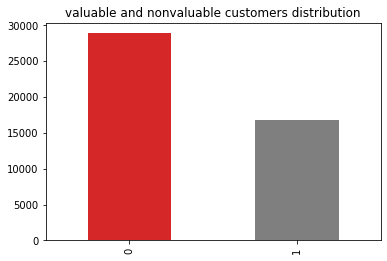

In [ ]:
df_val_cus['valuable'].value_counts().plot(kind='bar',title='valuable and nonvaluable customers distribution',color=colors)

plot

valuable customers/ non-valuable customers ( valuable_cust['monetary_score']>=3) & (valuable_cust['frequency_score']>=3)

In [ ]:
colors1 = ['#d62728']

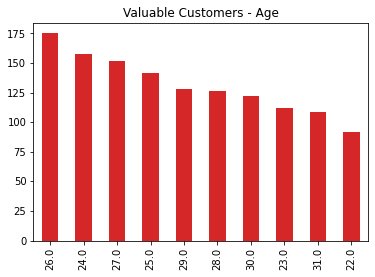

In [ ]:
df_val_join0['age'].value_counts().head(10).plot(kind='bar',title='Valuable Customers - Age',color=colors1)

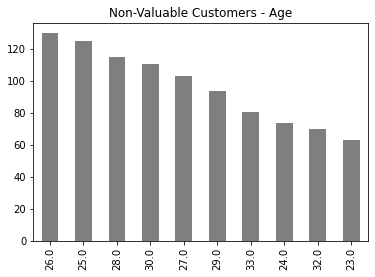

In [ ]:
df_val_join1['age'].value_counts().head(10).plot(kind='bar',title='Non-Valuable Customers - Age',color=colors2)

In [ ]:
colors2 = ['#7f7f7f']

In [ ]:
colors1 = ['#d62728']

In [ ]:
import matplotlib.pyplot as plt

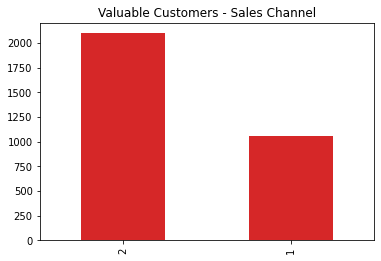

In [ ]:
df_val_join0['sales_channel_id'].value_counts().plot(kind='bar',title='Valuable Customers - Sales Channel',color=colors1)
plt.savefig('demo.png', transparent=True)

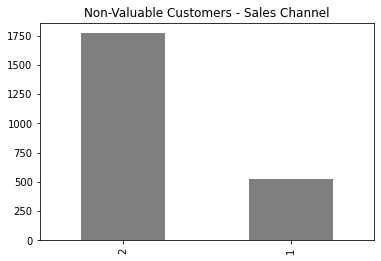

In [ ]:
df_val_join1['sales_channel_id'].value_counts().plot(kind='bar',title='Non-Valuable Customers - Sales Channel',color=colors2)

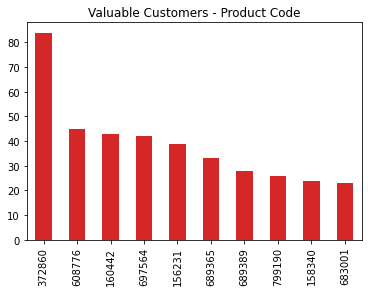

In [ ]:
df_val_join0['product_code'].value_counts().head(10).plot(kind='bar',title='Valuable Customers - Product Code',color=colors1)

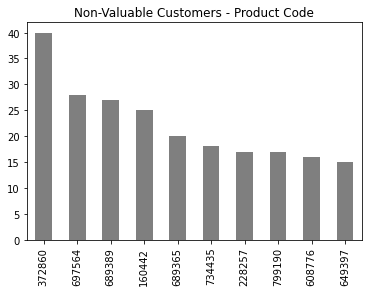

In [ ]:
df_val_join1['product_code'].value_counts().head(10).plot(kind='bar',title='Non-Valuable Customers - Product Code',color=colors2)

In [ ]:
##df_val_join0['club_member_status'].value_counts().plot(kind='bar',title='valuable customers- club member status distribution',color=colors1)

In [ ]:
##df_val_join1['club_member_status'].value_counts().plot(kind='bar',title='non valuable customers- club member status distribution')

In [ ]:
df_val_join = cleaning(df_val_join, {'FN': 0, 'Active':0, 'club_member_status': 'Null', 'valuable': 'Null', 'fashion_news_frequency': 'None', 'detail_desc': 'No Desc'})
df_val_join.loc[:,'fashion_news_frequency'].replace('NONE', 'None', inplace = True)

imp = SimpleImputer(missing_values=np.nan, strategy='mean')
df_val_join.age = imp.fit_transform(np.array(df_val_join.age).reshape(-1,1))

In [ ]:
df_val_join0=df_val_join.loc[df_val_join['valuable']==0]
df_val_join1=df_val_join.loc[df_val_join['valuable']==1]

In [ ]:
df_val_join0 [["article_id",'valuable']].groupby("article_id").agg(["count"]).round()

,valuable
,count
article_id,
111565001,6
111586001,13
111593001,18
111609001,2
123173001,7
...,...
927491002,1
932798001,3


In [53]:
df_val_join1 [["article_id",'valuable']].groupby("article_id").agg(["count"]).round()

,valuable
,count
article_id,
111565001,3
111586001,13
111593001,10
111609001,3
123173001,7
...,...
930533003,1
931869001,1


In [ ]:
##df_join[["article_id", "Recency","Frequency","Monetary"]].groupby("segment").agg(["mean","count","max"]).round()

In [35]:
def cleaning(data, dict):
  for k in dict:
    v = dict.get(k)
    data.loc[:,k].fillna(v, inplace = True)
  return data

In [36]:
df_join = cleaning(df_join, {'FN': 0, 'Active':0, 'club_member_status': 'Null', 'fashion_news_frequency': 'None', 'detail_desc': 'No Desc'})
df_join.loc[:,'fashion_news_frequency'].replace('NONE', 'None', inplace = True)

imp = SimpleImputer(missing_values=np.nan, strategy='mean')
df_join.age = imp.fit_transform(np.array(df_join.age).reshape(-1,1))

In [37]:
df_join

,article_id,customer_id,t_dat,price,sales_channel_id,FN,Active,club_member_status,fashion_news_frequency,age,...,department_name,index_code,index_name,index_group_no,index_group_name,section_no,section_name,garment_group_no,garment_group_name,detail_desc
0,917294005,0e1935a9ccb3fe43968e213c60f7e0a3a4bd3cc2957d90...,2020-09-06,0.025407,1,1.0,1.0,ACTIVE,Regularly,26.0,...,Blanks,F,Menswear,3,Menswear,26,Men Underwear,1002,Jersey Basic,Blank Staples is a streetwear collection of mi...
1,917294003,8b4ae180ab6e0218e05c187f19de91527609e798876418...,2020-09-04,0.025407,1,0.0,0.0,ACTIVE,None,23.0,...,Blanks,F,Menswear,3,Menswear,26,Men Underwear,1002,Jersey Basic,Blank Staples is a streetwear collection of mi...
2,917294002,55290d3c96b03fea13b0661050d61ca83959ddf69e480c...,2020-09-21,0.025407,2,1.0,1.0,ACTIVE,Regularly,55.0,...,Blanks,F,Menswear,3,Menswear,26,Men Underwear,1002,Jersey Basic,Blank Staples is a streetwear collection of mi...
3,917294003,f21ed0b2dd7ca23a5a77b30810ef6195c679e438b38afb...,2020-09-06,0.025407,2,0.0,0.0,ACTIVE,None,23.0,...,Blanks,F,Menswear,3,Menswear,26,Men Underwear,1002,Jersey Basic,Blank Staples is a streetwear collection of mi...
4,917294002,ae402aad9f70bd6330bd1d6a8374b52c1d71c1c88a1a6d...,2020-09-06,0.025407,2,0.0,0.0,ACTIVE,None,26.0,...,Blanks,F,Menswear,3,Menswear,26,Men Underwear,1002,Jersey Basic,Blank Staples is a streetwear collection of mi...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45688,852374002,40460c72eb5a580406ceda1c3174f24fd6a4fec35d3a23...,2020-05-12,0.033881,1,0.0,0.0,ACTIVE,None,47.0,...,Dress,A,Ladieswear,1,Ladieswear,15,Womens Everyday Collection,1013,Dresses Ladies,Calf-length dress in an airy viscose weave. Ro...
45689,852374005,cb53f245a870612e777d6099909dd49efec952e4f34830...,2020-05-08,0.033881,2,0.0,0.0,ACTIVE,None,48.0,...,Dress,A,Ladieswear,1,Ladieswear,15,Womens Everyday Collection,1013,Dresses Ladies,Calf-length dress in an airy viscose weave. Ro...
45690,852374003,fad40fccab9462e5f5d929a31f4cf12a74b8a0903d34aa...,2020-07-20,0.027102,1,1.0,1.0,ACTIVE,Regularly,35.0,...,Dress,A,Ladieswear,1,Ladieswear,15,Womens Everyday Collection,1013,Dresses Ladies,Calf-length dress in an airy viscose weave. Ro...
45691,852374003,c926d8c377d3f63a91505a488b254a719c9987c935d282...,2020-03-21,0.027102,2,0.0,0.0,ACTIVE,None,38.0,...,Dress,A,Ladieswear,1,Ladieswear,15,Womens Everyday Collection,1013,Dresses Ladies,Calf-length dress in an airy viscose weave. Ro...


In [28]:
no_name_col = ['article_id', 'customer_id', 't_dat', 'price', 'sales_channel_id', 'FN',
       'Active', 'club_member_status', 'fashion_news_frequency', 'age',
       'postal_code', 'product_code', 'prod_name', 'product_type_no',
       'product_type_name', 'product_group_name', 'graphical_appearance_no', 'colour_group_code',
       'perceived_colour_value_id',
       'perceived_colour_master_id', 
       'department_no', 'index_code',
       'index_group_no', 'section_no',
       'garment_group_no' ]

In [38]:
X = df_join.loc[:,no_name_col]
X = X.drop(['article_id', 'customer_id', 't_dat'], axis = 1)
y = pd.DataFrame(df_join.article_id)

In [ ]:
# X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.33, random_state = 42 )

In [ ]:
# X_train = encodeCategory(X_train)
# X_test = encodeCategory(X_test)
# X_train = scaleData(X_train)
# X_test = scaleData(X_test)

# X_train_PCA = createPCA(X_train)
# X_test_PCA = createPCA(X_test)

#PCA

In [39]:
def encodeCategory(data):
  encoder = LabelEncoder()
  encoded_sample_join = data.copy()
  for i in range(len(data.columns)):
    if encoded_sample_join.iloc[:,i].dtypes == object:
      encoded_sample_join.iloc[:,i] = encoder.fit_transform(encoded_sample_join.iloc[:,i])
  return encoded_sample_join

def scaleData(data):
  return StandardScaler().fit_transform(data)

def createPCA(data):
  pca = PCA(0.95)
  PCA_result = pca.fit_transform(data)
  PCA_result_df = pd.DataFrame(PCA_result)
  return PCA_result_df

def cos_sim(v1, v2):
    return np.dot(v1, v2) / (np.linalg.norm(v1) * np.linalg.norm(v2))

In [40]:
X = encodeCategory(X)
X = scaleData(X)
X_PCA = createPCA(X)

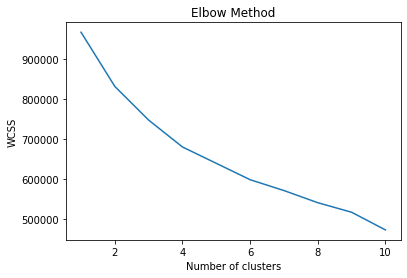

In [41]:
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(X_PCA)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [42]:
y_pred = kmeans.fit(X_PCA).predict(X_PCA)
y_pred.shape

(45693,)

In [43]:
df_join['kmeans_pred'] = y_pred

In [44]:
valuable_arr = df_val_cus['valuable'].tolist()
df_join['val_cus'] = valuable_arr

In [77]:
df_train = df_join[['customer_id','kmeans_pred','val_cus']]
df_train.head()

,customer_id,kmeans_pred,val_cus
0,0e1935a9ccb3fe43968e213c60f7e0a3a4bd3cc2957d90...,4,0
1,8b4ae180ab6e0218e05c187f19de91527609e798876418...,0,0
2,55290d3c96b03fea13b0661050d61ca83959ddf69e480c...,4,0
3,f21ed0b2dd7ca23a5a77b30810ef6195c679e438b38afb...,0,0
4,ae402aad9f70bd6330bd1d6a8374b52c1d71c1c88a1a6d...,0,0


In [78]:
df_train

,customer_id,kmeans_pred,val_cus
0,0e1935a9ccb3fe43968e213c60f7e0a3a4bd3cc2957d90...,4,0
1,8b4ae180ab6e0218e05c187f19de91527609e798876418...,0,0
2,55290d3c96b03fea13b0661050d61ca83959ddf69e480c...,4,0
3,f21ed0b2dd7ca23a5a77b30810ef6195c679e438b38afb...,0,0
4,ae402aad9f70bd6330bd1d6a8374b52c1d71c1c88a1a6d...,0,0
...,...,...,...
45688,40460c72eb5a580406ceda1c3174f24fd6a4fec35d3a23...,3,0
45689,cb53f245a870612e777d6099909dd49efec952e4f34830...,3,1
45690,fad40fccab9462e5f5d929a31f4cf12a74b8a0903d34aa...,5,1
45691,c926d8c377d3f63a91505a488b254a719c9987c935d282...,3,1


[reference for changing the format of customer_id](https://www.kaggle.com/c/h-and-m-personalized-fashion-recommendations/discussion/308635)

In [79]:
# turn hex code to float
df_train['customer_id'] = df_train['customer_id'].apply(lambda x: int(x[-16:],16)).astype('int64')
##df_train.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [92]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
df_join_selected_feature = df_join[['article_id', 'customer_id', 't_dat', 'postal_code', 'prod_name','kmeans_pred', 'val_cus']]
df_join_selected_feature.loc[:, 'customer_id'] = df_join_selected_feature['customer_id'].apply(lambda x: int(x[-16:],16)).astype('int64')

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1773: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(ilocs[0], value, pi)


In [93]:
from sklearn.linear_model import LogisticRegression
X = df_join_selected_feature[['kmeans_pred','customer_id']]
y = df_join_selected_feature['val_cus']
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.33, random_state = 42 )

In [80]:
#from sklearn.linear_model import LogisticRegression

#X = df_train[['kmeans_pred','customer_id']]
#y = df_train[['val_cus']]

#X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.33, random_state = 42 )

In [85]:
y_train

,val_cus
408,0
17353,0
7955,0
29149,0
26163,1
...,...
11284,0
44732,0
38158,1
860,0


In [94]:
lr = LogisticRegression()

lr.fit(X_train, y_train)
prediction_1 = lr.predict(X_train)
prediction_2 = lr.predict(X_test)


print('The intercept and coef for the model is {} and {}'.format(lr.intercept_, lr.coef_))
print('The accuracy for this model is:',lr.score(X_test, y_test))

The intercept and coef for the model is [-3.70684588e-38] and [[-8.56916640e-38  1.18236999e-22]]
The accuracy for this model is: 0.5024869023144771


In [95]:
prediction_all_X = np.concatenate((prediction_1, prediction_2))

In [96]:
pred_result = pd.DataFrame({'customer_id':X.customer_id, 'will_purchase':prediction_all_X})

In [97]:
final_df = pd.merge(df_join_selected_feature, pred_result, on = 'customer_id', how = 'left')

In [98]:
final_df

,article_id,customer_id,t_dat,postal_code,prod_name,kmeans_pred,val_cus,will_purchase
0,917294005,1909136839699673063,2020-09-06,e25022b6c3a21ff90334cb65953ab51a675fe4e129dbf6...,BLANKS JACK RELAXED LS TEE,4,0,0
1,917294003,5419979159671479272,2020-09-04,dd1883ab2f75dd117c7b7d79c1c5c24d1b4b0e6239d26e...,BLANKS JACK RELAXED LS TEE,0,0,1
2,917294002,-2612195531719397764,2020-09-21,896e25f76cedf38ead5b6b503e9d5ca8c2eb19038d40fa...,BLANKS JACK RELAXED LS TEE,4,0,1
3,917294003,-894930897839590416,2020-09-06,2e97a0327a639e1d273c6e23722c1c533d351809c4a8c5...,BLANKS JACK RELAXED LS TEE,0,0,0
4,917294002,-8845919207528614688,2020-09-06,9cfc6c0e96bb8b7441576581506a88573816ea0a3eddf0...,BLANKS JACK RELAXED LS TEE,0,0,0
...,...,...,...,...,...,...,...,...
53958,852374002,6642304985485367002,2020-05-12,15ddfb15fef03a987592a47f1fc8c23c4d345d44bbc067...,Mac,3,0,0
53959,852374005,7996926778278796444,2020-05-08,53a4eafb74e3be70db0c8aeac6d7b26b4dca68a5021d8b...,Mac,3,1,1
53960,852374003,-4646477664213451481,2020-07-20,89376eb923f7eb2164774e47ac5cdb695b5150fe22dd6c...,Mac,5,1,1
53961,852374003,2560374459140506326,2020-03-21,0a95dfe00f7b462dbac4d2aeae98e29a1b41e5807ab181...,Mac,3,1,1


In [99]:
will_pur = final_df[final_df['will_purchase'] == 1].reset_index(drop=True) 
will_pur.head(10)

,article_id,customer_id,t_dat,postal_code,prod_name,kmeans_pred,val_cus,will_purchase
0,917294003,5419979159671479272,2020-09-04,dd1883ab2f75dd117c7b7d79c1c5c24d1b4b0e6239d26e...,BLANKS JACK RELAXED LS TEE,0,0,1
1,917294002,-2612195531719397764,2020-09-21,896e25f76cedf38ead5b6b503e9d5ca8c2eb19038d40fa...,BLANKS JACK RELAXED LS TEE,4,0,1
2,917294003,-4437982489899247089,2020-09-17,9616843f2d84c53fb6e3f37968b05bd9ac25e5fa9ffcf1...,BLANKS JACK RELAXED LS TEE,0,0,1
3,917300004,-2256464730143437546,2020-09-07,e63eab66173591c74824dd45496c6b087a2daa58a0f53d...,BLANKS KENT REGULAR JOGGER,6,0,1
4,917300005,-5246830067937774675,2020-09-20,6359ae4fd62ceae481f69a2b1a32b4d7e1837170370eaf...,BLANKS KENT REGULAR JOGGER,4,0,1
5,917293004,-8256750206773215432,2020-09-10,a148d21fb82beeef95f5d210a7e77a6e2a9754af7213e1...,BLANKS JACOB RELAXED SS TEE,4,0,1
6,917293004,-3456865465950353267,2020-09-09,05e3ea6414f55faca608f86e16e5ae80344aebb50f5202...,BLANKS JACOB RELAXED SS TEE,0,0,1
7,917293004,-3456865465950353267,2020-09-09,05e3ea6414f55faca608f86e16e5ae80344aebb50f5202...,BLANKS JACOB RELAXED SS TEE,0,0,1
8,917293006,-6008468841853139673,2020-09-04,6523c6d52b9d8803c8a9f00f812ec63bb1fefe9ec5fa85...,BLANKS JACOB RELAXED SS TEE,4,0,1
9,917293003,2248260305889145091,2020-09-04,290ea738e247f582599be30c96e02c313e9f31d4ce2bc6...,BLANKS JACOB RELAXED SS TEE,4,0,1


In [100]:
cluster_product = client.query('''
  SELECT 
    *
  FROM `hmrecommendation.hm_dataset.cluster_product` ''').to_dataframe()

In [101]:
def get_product(cluster):
  prod_lst = []
  prods = (cluster_product[cluster_product['kmeans_pred'] == cluster]['article_id']).tolist()
  prod_lst.append(prods)
  return prod_lst

In [102]:
def rec_prod(df):
  prod_list = []
  for i in range(len(df)):
    x = df['kmeans_pred'][i]
    prod_list.append(get_product(x)[0])
  return prod_list

In [ ]:
len(will_pur)

In [103]:
rec_list = rec_prod(will_pur)
rec_list[3]

[685616010, 743218011, 743234003, 372860001, 158340001, 156231001]

In [104]:
will_pur['recommendation'] = rec_list
will_pur.head(10)

,article_id,customer_id,t_dat,postal_code,prod_name,kmeans_pred,val_cus,will_purchase,recommendation
0,917294003,5419979159671479272,2020-09-04,dd1883ab2f75dd117c7b7d79c1c5c24d1b4b0e6239d26e...,BLANKS JACK RELAXED LS TEE,0,0,1,"[543035019, 715024004, 720504004, 816083001, 8..."
1,917294002,-2612195531719397764,2020-09-21,896e25f76cedf38ead5b6b503e9d5ca8c2eb19038d40fa...,BLANKS JACK RELAXED LS TEE,4,0,1,"[871517002, 876926001, 871517008, 909371001, 9..."
2,917294003,-4437982489899247089,2020-09-17,9616843f2d84c53fb6e3f37968b05bd9ac25e5fa9ffcf1...,BLANKS JACK RELAXED LS TEE,0,0,1,"[543035019, 715024004, 720504004, 816083001, 8..."
3,917300004,-2256464730143437546,2020-09-07,e63eab66173591c74824dd45496c6b087a2daa58a0f53d...,BLANKS KENT REGULAR JOGGER,6,0,1,"[685616010, 743218011, 743234003, 372860001, 1..."
4,917300005,-5246830067937774675,2020-09-20,6359ae4fd62ceae481f69a2b1a32b4d7e1837170370eaf...,BLANKS KENT REGULAR JOGGER,4,0,1,"[871517002, 876926001, 871517008, 909371001, 9..."
5,917293004,-8256750206773215432,2020-09-10,a148d21fb82beeef95f5d210a7e77a6e2a9754af7213e1...,BLANKS JACOB RELAXED SS TEE,4,0,1,"[871517002, 876926001, 871517008, 909371001, 9..."
6,917293004,-3456865465950353267,2020-09-09,05e3ea6414f55faca608f86e16e5ae80344aebb50f5202...,BLANKS JACOB RELAXED SS TEE,0,0,1,"[543035019, 715024004, 720504004, 816083001, 8..."
7,917293004,-3456865465950353267,2020-09-09,05e3ea6414f55faca608f86e16e5ae80344aebb50f5202...,BLANKS JACOB RELAXED SS TEE,0,0,1,"[543035019, 715024004, 720504004, 816083001, 8..."
8,917293006,-6008468841853139673,2020-09-04,6523c6d52b9d8803c8a9f00f812ec63bb1fefe9ec5fa85...,BLANKS JACOB RELAXED SS TEE,4,0,1,"[871517002, 876926001, 871517008, 909371001, 9..."
9,917293003,2248260305889145091,2020-09-04,290ea738e247f582599be30c96e02c313e9f31d4ce2bc6...,BLANKS JACOB RELAXED SS TEE,4,0,1,"[871517002, 876926001, 871517008, 909371001, 9..."


In [87]:
#y_pred = model.predict(X_test)


In [88]:
#len(y_pred)

15079

In [89]:
#type(y_pred)

numpy.ndarray

In [90]:
#df_train.customer_id

0        1909136839699673063
1        5419979159671479272
2       -2612195531719397764
3        -894930897839590416
4       -8845919207528614688
                ...         
45688    6642304985485367002
45689    7996926778278796444
45690   -4646477664213451481
45691    2560374459140506326
45692     436506676051211487
Name: customer_id, Length: 45693, dtype: int64

In [91]:
#pred_result = pd.DataFrame({'customer_id':df_train.customer_id, 'will_purchase':y_pred})

ValueError: ignored

In [69]:
#pred_result.shape

NameError: ignored

In [ ]:
#pred_result

,customer_id,will_purchase
0,-7623024413796073127,1
1,2470789589213503301,0
2,4939869408899499328,0
3,4742460936492319223,0
4,-2552430852289924051,1
...,...,...
45688,-4306331673949066144,1
45689,-8020552323176762224,1
45690,-2792359604340127375,1
45691,3617453185167678670,0


In [ ]:
# use the validation dataset to validate the model's performance
# maybe change SQL query to SELECT customer_id FROM [TABLE], to save more time

df_valid = client.query('''
  SELECT 
    *
  FROM `hmrecommendation.hm_dataset.validation_dataset`''').to_dataframe()

In [ ]:
# turn hex code to float
df_valid['customer_id'] = df_valid['customer_id'].apply(lambda x: int(x[-16:],16) ).astype('int64')

In [ ]:
# perform left join based on pred_result
final_df = pd.merge(pred_result, df_valid, on = 'customer_id', how = 'left')
final_df.shape

(45693, 38)

In [ ]:
final_df

,customer_id,will_purchase,count,article_id,t_dat,price,sales_channel_id,FN,Active,club_member_status,fashion_news_frequency,age,postal_code,product_code,prod_name,product_type_no,product_type_name,product_group_name,graphical_appearance_no,graphical_appearance_name,colour_group_code,colour_group_name,perceived_colour_value_id,perceived_colour_value_name,perceived_colour_master_id,perceived_colour_master_name,department_no,department_name,index_code,index_name,index_group_no,index_group_name,section_no,section_name,garment_group_no,garment_group_name,detail_desc,rn
0,-7623024413796073127,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2470789589213503301,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,4939869408899499328,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,4742460936492319223,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,-2552430852289924051,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45688,-4306331673949066144,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
45689,-8020552323176762224,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
45690,-2792359604340127375,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
45691,3617453185167678670,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


array([1, 0, 0, ..., 1, 0, 0])

In [ ]:
purchase = 0

# if will purchase = 1, counter += 1
for value in pred_result.will_purchase.values:
  if value == 1:
    purchase += 1

print('The percentage of customer will purchase the item is:', purchase / len(final_df))

The percentage of customer will purchase the item is: 0.01871109641386225


另個想法

In [ ]:
X_train, X_validation, y_train, y_validation = train_test_split(X, y, test_size = 0.33, random_state = 42)

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names unseen at fit time:
- Active
- FN
- age
- article_id
- club_member_status
- ...
Feature names seen at fit time, yet now missing:
- kmeans_pred

  warnings.warn(message, FutureWarning)


TypeError: ignored